# Case Study - Diamond Price Prediction

### Business Understanding
Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price.

The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

### Understanding the 4 C's
- Cut
- Color
- Clarity
- Carat  

Credits - https://www.brides.com/story/choosing-engagement-ring-four-cs

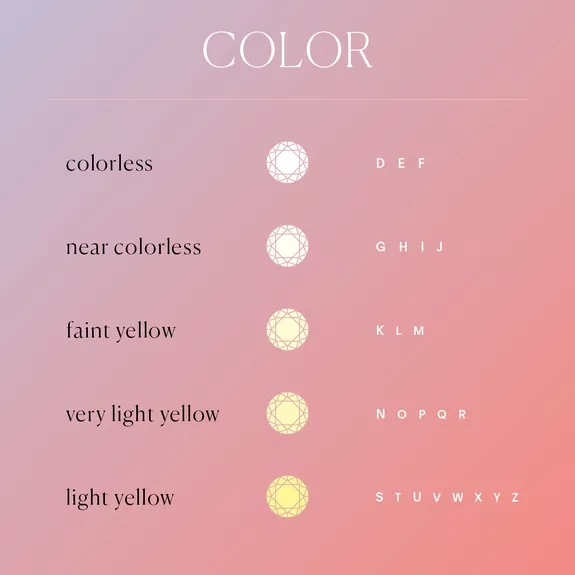

In [1]:
from IPython import display
display.Image("img/color_.jpg")
# this is version 1 of this project

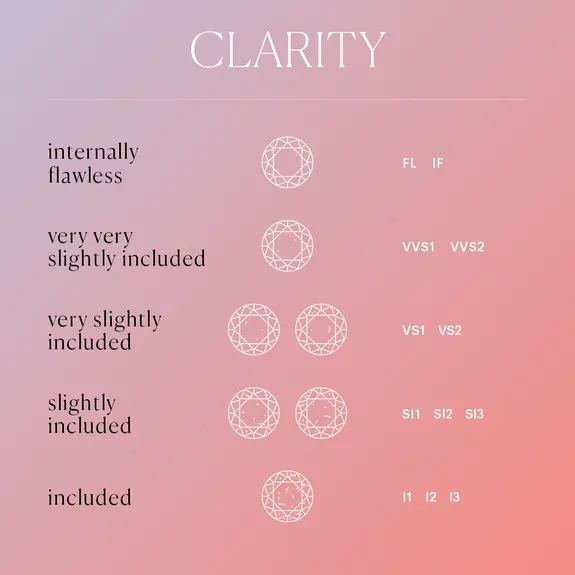

In [2]:
display.Image("img/clarity_.jpg")

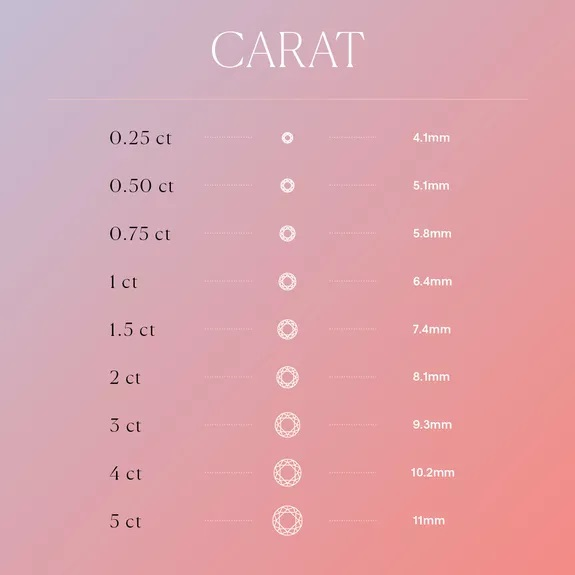

In [3]:
display.Image("img/carat_.jpg")

## Task

In this notebook, you will learn:
- How to split the given data into Train and Test?
- How to perform Data Preparation on - 
    - Categorical Columns - OneHotEncoding and LabelEncoding
    - Numerical Columns - Standardization and Normalization
- How to build ML models that can predict Price of a Diamond?

## Import the required Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Data

In [8]:
df = pd.read_csv('data/diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


`price` price in US dollars (\\$ 326 - \\$ 18,823)

`carat` weight of the diamond (0.2 - 5.01)

`cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)

`color` diamond colour, from J (worst) to D (best)

`clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

`x` length in mm (0 - 10.74)

`y` width in mm (0 - 58.9)

`z` depth in mm (0 - 31.8)

`depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)

`table` width of top of diamond relative to widest point (43 - 95)

In [9]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [10]:
df.shape

(53940, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Machine Learning Problem

**Build a system which can take features of diamond like carat, cut, color, clarity, x, y, z, etc.. and `predicts the price of diamond`.**

Target Variable: ______

In [13]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [14]:
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]

df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


`price` price in US dollars (\\$ 326 - \\$ 18,823)

`carat` weight of the diamond (0.2 - 5.01)

`cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)

`color` diamond colour, from J (worst) to D (best)

`clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

`x` length in mm (0 - 10.74)

`y` width in mm (0 - 58.9)

`z` depth in mm (0 - 31.8)

`depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43 - 79)

`table` width of top of diamond relative to widest point (43 - 95)

## Exploratory Data Analysis

- Univariate Analysis **`(Self)`**
- Bivariate Analysis **`(Self)`**
- Missing Values **`(Self)`**
- Outliers **`(Self)`**

## Data Preparation

- Train Test Split
- Encoding for Categorical Columns 
    - Ordinal : LabelEncoding or OrdinalEncoding
    - Nominal : OneHotEncoding or get_dummies
- Encoding for Numerical Columns
    - Standardization (z-transformation)

**We will be following below mentioned steps:**  
a. Identify the Target Variable and Splitting the Data into train and test  
b. Separating Categorical and Numerical Columns  
c. Rescaling Numerical Columns (Standardization or z-transformation)  
d. Applying OneHotEncoding on Categorical Columns  
e. Applying Label Encoding on Categorical Columns    
f. Concatinating the Encoded Categorical Features and Scaled Numerical Features  

### a. Identify the Target Variable and Splitting the Data into Train and Test

`!pip install -U scikit-learn`

In [15]:
# !pip install -U scikit-learn

In [16]:
import sklearn

print(sklearn.__version__)

# For some of the code below, make sure you have sklearn version 1.1 or above.

1.3.0


In [17]:
# Identifying the inputs (X) and output (y)

y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

In [18]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=1)

In [19]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
11020,1.20,Fair,H,SI2,64.8,60.0,6.55,6.59,4.26
53040,0.71,Ideal,G,SI1,62.5,57.0,5.67,5.69,3.55
24706,0.41,Ideal,I,SI1,61.6,56.0,4.79,4.82,2.96
10682,1.03,Good,H,SI1,63.3,57.0,6.39,6.41,4.05
3567,0.70,Ideal,E,VS1,60.5,56.0,5.78,5.83,3.51


In [20]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(13485, 9) (13485,)
(40455, 9) (40455,)


### b. Separating Categorical and Numerical Columns: 

In [21]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
11020,1.20,Fair,H,SI2,64.8,60.0,6.55,6.59,4.26
53040,0.71,Ideal,G,SI1,62.5,57.0,5.67,5.69,3.55
24706,0.41,Ideal,I,SI1,61.6,56.0,4.79,4.82,2.96
10682,1.03,Good,H,SI1,63.3,57.0,6.39,6.41,4.05
3567,0.70,Ideal,E,VS1,60.5,56.0,5.78,5.83,3.51


In [22]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [23]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
11020,Fair,H,SI2
53040,Ideal,G,SI1
24706,Ideal,I,SI1
10682,Good,H,SI1
3567,Ideal,E,VS1


In [24]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
11020,1.20,64.8,60.0,6.55,6.59,4.26
53040,0.71,62.5,57.0,5.67,5.69,3.55
24706,0.41,61.6,56.0,4.79,4.82,2.96
10682,1.03,63.3,57.0,6.39,6.41,4.05
3567,0.70,60.5,56.0,5.78,5.83,3.51


### c. Scaling the Numerical Features

In [25]:
X_train_num.head()

,carat,depth,table,x,y,z
11020,1.20,64.8,60.0,6.55,6.59,4.26
53040,0.71,62.5,57.0,5.67,5.69,3.55
24706,0.41,61.6,56.0,4.79,4.82,2.96
10682,1.03,63.3,57.0,6.39,6.41,4.05
3567,0.70,60.5,56.0,5.78,5.83,3.51


In [26]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,depth,table,x,y,z
11020,0.839966,2.133649,1.148618,0.727673,0.751519,1.031149
53040,-0.184429,0.520084,-0.192470,-0.050654,-0.035928,0.019198
24706,-0.811610,-0.111312,-0.639499,-0.828981,-0.797127,-0.821719
10682,0.484564,1.081324,-0.192470,0.586159,0.594029,0.731840
3567,-0.205335,-0.883017,-0.639499,0.046637,0.086564,-0.037813


In [27]:
X_train_num_rescaled.describe()

,carat,depth,table,x,y,z
count,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04,1.348500e+04
mean,-2.681084e-16,2.022236e-15,3.574778e-17,-7.031001e-18,-9.706404e-16,-9.535486e-17
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.250636e+00,-1.245860e+01,-6.003849e+00,-5.065557e+00,-5.014342e+00,-5.040557e+00
25%,-8.325156e-01,-4.620867e-01,-6.394987e-01,-8.997382e-01,-8.846208e-01,-8.929831e-01
50%,-2.053348e-01,9.915347e-02,-1.924695e-01,-3.296484e-02,-1.842923e-02,-2.356024e-02
75%,5.054700e-01,5.200836e-01,7.015889e-01,7.188284e-01,6.990223e-01,7.175871e-01
max,6.693653e+00,7.816206e+00,1.679464e+01,3.787914e+00,2.280878e+01,3.952980e+00


In [28]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 6
Mean of each column: [ 0.79821802 61.75866518 57.43055247  5.72727104  5.7310634   3.53653022]
Std of each column: [0.47833101 1.42541474 2.23699028 1.13063005 1.14293429 0.7016149 ]


### d. Applying OneHotEncoding on Categorical Columns

In [29]:
X_train_cat['cut'].value_counts(normalize=True)

Ideal        0.396663
Premium      0.261846
Very Good    0.224101
Good         0.087208
Fair         0.030182
Name: cut, dtype: float64

In [30]:
X_train_cat['color'].value_counts(normalize=True)

G    0.213052
E    0.180793
F    0.177308
H    0.150983
D    0.123248
I    0.102707
J    0.051910
Name: color, dtype: float64

In [31]:
X_train_cat['clarity'].value_counts(normalize=True)

SI1     0.239600
VS2     0.229440
SI2     0.172117
VS1     0.151428
VVS2    0.093585
VVS1    0.067037
IF      0.033074
I1      0.013719
Name: clarity, dtype: float64

In [32]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=3000, sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,cut_Premium,cut_Very Good,cut_infrequent_sklearn,clarity_VS2,clarity_infrequent_sklearn
11020,0.0,0.0,1.0,0.0,1.0
53040,0.0,0.0,0.0,0.0,0.0
24706,0.0,0.0,0.0,0.0,0.0
10682,0.0,0.0,1.0,0.0,0.0
3567,0.0,0.0,0.0,0.0,1.0


In [33]:
encoder_.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [34]:
encoder_.infrequent_categories_

[array(['Fair', 'Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI2', 'VS1', 'VVS1', 'VVS2'], dtype=object)]

In [35]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
11020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53040,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24706,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10682,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3567,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### e. Applying Label Encoding on Categorical Columns

In [36]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
11020
53040
24706
10682
3567


In [37]:
X_train_cat.cut.unique()

array(['Fair', 'Ideal', 'Good', 'Very Good', 'Premium'], dtype=object)

In [38]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,cut
11020,1
53040,4
24706,4
10682,2
3567,4


In [39]:
X_train_cat.color.unique()

array(['H', 'G', 'I', 'E', 'F', 'D', 'J'], dtype=object)

In [40]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()

,cut,color
11020,1,3
53040,4,4
24706,4,2
10682,2,3
3567,4,6


In [41]:
X_train_cat.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'IF', 'VS2', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [42]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,cut,color,clarity
11020,1,3,2
53040,4,4,3
24706,4,2,3
10682,2,3,3
3567,4,6,5


### f. Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [43]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
11020,0.839966,2.133649,1.148618,0.727673,0.751519,1.031149,1,3,2
53040,-0.184429,0.520084,-0.192470,-0.050654,-0.035928,0.019198,4,4,3
24706,-0.811610,-0.111312,-0.639499,-0.828981,-0.797127,-0.821719,4,2,3
10682,0.484564,1.081324,-0.192470,0.586159,0.594029,0.731840,2,3,3
3567,-0.205335,-0.883017,-0.639499,0.046637,0.086564,-0.037813,4,6,5


### g. Preparing Test Data

In [44]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
2714,0.33,Ideal,H,SI1,61.7,55.0,4.43,4.46,2.74
14653,1.20,Ideal,I,VS2,62.1,57.0,6.78,6.71,4.19
52760,0.62,Ideal,D,VS1,61.0,57.0,5.51,5.54,3.37
48658,0.34,Good,H,VS2,63.1,56.0,4.41,4.46,2.80
14812,1.20,Ideal,E,SI2,62.5,55.0,6.77,6.84,4.25


In [45]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 2714 to 29372
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


In [46]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
2714,Ideal,H,SI1
14653,Ideal,I,VS2
52760,Ideal,D,VS1
48658,Good,H,VS2
14812,Ideal,E,SI2


In [47]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
2714,0.33,61.7,55.0,4.43,4.46,2.74
14653,1.20,62.1,57.0,6.78,6.71,4.19
52760,0.62,61.0,57.0,5.51,5.54,3.37
48658,0.34,63.1,56.0,4.41,4.46,2.80
14812,1.20,62.5,55.0,6.77,6.84,4.25


In [48]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
2714,-0.978858,-0.041157,-1.086528,-1.147388,-1.112105,-1.135281
14653,0.839966,0.239464,-0.192470,0.931099,0.856512,0.931380
52760,-0.372583,-0.532242,-0.192470,-0.192168,-0.167169,-0.237353
48658,-0.957952,0.941014,-0.639499,-1.165077,-1.112105,-1.049764
14812,0.839966,0.520084,-1.086528,0.922255,0.970254,1.016897


In [49]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
2714
14653
52760
48658
14812


In [50]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
2714,4,3,3
14653,4,2,4
52760,4,7,5
48658,2,3,4
14812,4,6,2


In [51]:
X_test_cat.index

Int64Index([ 2714, 14653, 52760, 48658, 14812, 37498, 12456, 16738, 21542,
            40732,
            ...
             3779, 25392,  4486, 24621,  5791, 27598, 39036, 21461, 11572,
            29372],
           dtype='int64', length=40455)

In [52]:
X_test_cat.shape

(40455, 3)

In [74]:
# OHE of test
X_test_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                                   columns = encoder.get_feature_names_out(X_test_cat.columns),
                                   index = X_test_cat.index)

X_test_ohe.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
2714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14653,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
52760,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48658,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14812,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
2714,-0.978858,-0.041157,-1.086528,-1.147388,-1.112105,-1.135281,4,3,3
14653,0.839966,0.239464,-0.192470,0.931099,0.856512,0.931380,4,2,4
52760,-0.372583,-0.532242,-0.192470,-0.192168,-0.167169,-0.237353,4,7,5
48658,-0.957952,0.941014,-0.639499,-1.165077,-1.112105,-1.049764,2,3,4
14812,0.839966,0.520084,-1.086528,0.922255,0.970254,1.016897,4,6,2


## Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [57]:
y_test_pred = regressor.predict(X_test_transformed)

In [58]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2714,564,-888.889146
14653,5914,6575.017841
52760,2562,3701.649747
48658,537,-640.438780
14812,5964,6958.819995


<Axes: xlabel='price', ylabel='Count'>

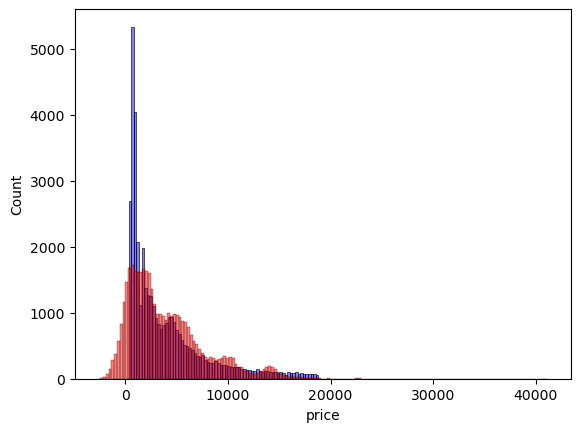

In [59]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [60]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  812.1188607058612
Mean Squared Error:  1470589.944733738
Root Mean Squared Error:  1212.6788300014716


## KNN Regression

In [64]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [65]:
y_test_pred = regressor.predict(X_test_transformed)

In [66]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2714,564,528.6
14653,5914,5548.0
52760,2562,2903.6
48658,537,530.6
14812,5964,5667.8


<Axes: xlabel='price', ylabel='Count'>

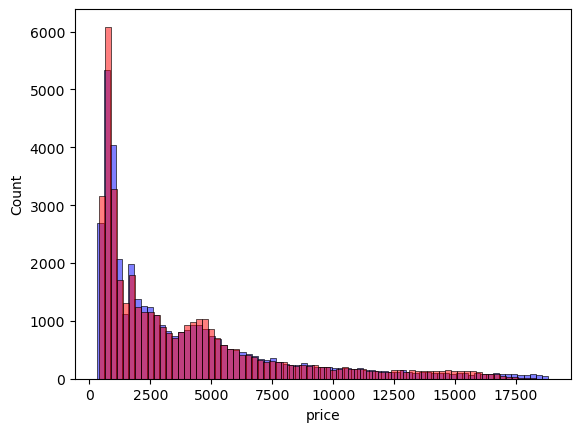

In [67]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [68]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  439.6049091583241
Mean Squared Error:  655313.7048285749
Root Mean Squared Error:  809.5144871023464


## Decision Tree Regression

In [69]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [70]:
y_test_pred = regressor.predict(X_test_transformed)

In [71]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2714,564,511.0
14653,5914,5699.0
52760,2562,2243.0
48658,537,534.0
14812,5964,7336.0


<Axes: xlabel='price', ylabel='Count'>

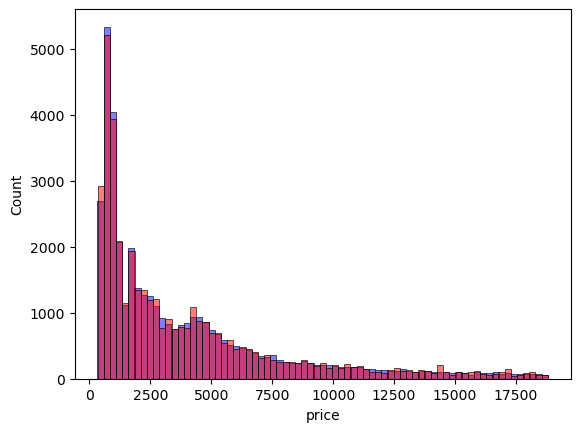

In [72]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [73]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  399.9789519218885
Mean Squared Error:  623413.1828883945
Root Mean Squared Error:  789.5651859652846


## Random Forest Regression

In [72]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [73]:
y_test_pred = regressor.predict(X_test_transformed)

In [74]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491,1815.95
21073,9248,8591.12
42161,1284,1247.88
35974,921,1038.90
7641,4268,4287.16


<AxesSubplot:xlabel='price', ylabel='Count'>

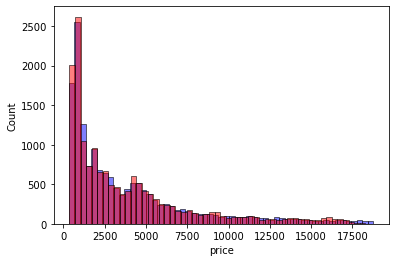

In [75]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [76]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  270.0064409310855
Mean Squared Error:  291050.5581342078
Root Mean Squared Error:  539.4910176585036
